In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data():
    np.random.seed(0)
    x = np.linspace(0, 2 * np.pi, 100)
    y = np.sin(x) + np.random.normal(0, 0.1, size=len(x))
    return x, y

In [6]:
def neuro_fuzzy(x, y, num_epocas, alfa, m, c, s, p, q):
    n = x.shape[0]
    if x.ndim == 1:
        x = x.reshape(-1, 1)

    for k in range(num_epocas):
        for i in range(n):
            ys, w, b = error(x[i], c[i], s[i], p[i], q)
            dedys = ys - y[i]

            for j in range(m):
                dysdwj = (y[i]-ys)/b  # Derivada da função de ativação sigmoidal
                dyjdpij = x[i]  # Derivada parcial em relação a p[i, j]
                dwjdcij = w[j] * (x[i] - c[i, j]) / (s[i, j] ** 2)  # Derivada parcial em relação a c[i, j]
                dwjdsij = w[j] * (((x[i] - c[i, j]) ** 2) / (s[i, j] ** 3))  # Derivada parcial em relação a s[i, j]
                dysdyj = w[j] / b
                dyjdqj = 1

                # Atualização usando o gradiente descendente
                c[i, j] -= alfa * dedys * dysdwj * dwjdcij
                s[i, j] -= alfa * dedys * dysdwj * dwjdsij
                p[i, j] -= alfa * dedys * dysdyj * dyjdpij
                q[j] -= alfa * dedys * dysdyj * dyjdqj
        #print(k)

    return c, s, p, q

In [4]:
def error(x, c, s, p, q):
    m = c.shape[0]  # Obtém o número de regras fuzzy
    ysum = np.zeros(m)
    miaijmult = np.ones(m)

    for j in range(m):
        ysum[j] += p[j] * x + q[j]  # Acumula a contribuição da regra fuzzy para a saída ysum[j]
        miaijmult[j] *= np.exp(-(x - c[j]) / (2 * s[j]))  # Acumula a contribuição da regra fuzzy para miaijmult[j]

    w = miaijmult
    y = ysum
    a = np.sum(w * y)
    b = np.sum(w)

    ys = a / b
    return ys, w, b

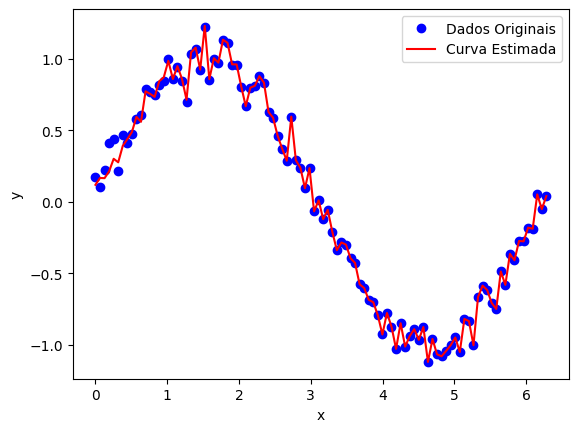

In [12]:
x, y = generate_data()

num_epocas = 100
alfa = 0.05  # Taxa de aprendizado
m = 2  # Número de regras fuzzy
n = x.shape[0]  # Número de pontos de dados
c = np.zeros((n, m))  # Matriz de centros para cada regra fuzzy
s = np.zeros((n, m))  # Matriz de larguras para cada regra fuzzy
p = np.random.rand(n, m)  # Matriz de pesos para cada regra fuzzy
q = np.random.rand(m)  # Vetor de offsets para cada regra fuzzy

for j in range(m):  # Loop para inicializar os parâmetros para cada regra fuzzy
    for i in range(n):
        xmax = np.max(x, axis=0)
        xmin = np.min(x, axis=0)
        deltai = (xmax - xmin) / (m - 1)  # Calcula o intervalo delta para distribuir os centros das regras fuzzy
        c[i, j] = xmin + (j - 1) * deltai
        s[i, j] = deltai / np.log(4)
        p[i, j] = np.random.rand()

    q[j] = np.random.rand()

c, s, p, q = neuro_fuzzy(x, y, num_epocas, alfa, m, c, s, p, q)

x_est = np.linspace(0, 2 * np.pi, 100)
y_est = np.zeros_like(x_est)

for i in range(len(x_est)):
    xs = x_est[i]
    ys, _, _ = error(xs, c[i], s[i], p[i], q)
    y_est[i] = ys

plt.plot(x, y, 'bo', label='Dados Originais')
plt.plot(x_est, y_est, 'r-', label='Curva Estimada')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()